In [1]:
##Import libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
## Initialising the CNN
classifier = Sequential()

In [3]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


Instructions for updating:
Colocations handled automatically by placer.


In [4]:
## Flattening
classifier.add(Flatten())

In [5]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 128, activation = 'relu'))
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [6]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255)

In [8]:
## Scaling test data
##no  data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [30]:
## Importing training data
train_set = train_datagen.flow_from_directory('train_set',
                                               target_size=(64, 64),
                                               batch_size=20,
                                               class_mode='binary')

Found 2000 images belonging to 2 classes.


In [10]:
#which is cat which is dog?
label_map = (train_set.class_indices)
print(label_map)

{'Burnt_Pizza': 0, 'Good_Pizza': 1}


In [29]:
## Importng test data
test_set = test_datagen.flow_from_directory('test_set',
                                            target_size=(64, 64),
                                            batch_size=20,
                                            class_mode='binary')

Found 100 images belonging to 2 classes.


In [31]:
## fitting model to images
classifier.fit_generator(
        train_set,
        steps_per_epoch=30,
        epochs = 50,validation_data=test_set,
        validation_steps=20
        )

Epoch 1/50
30/30 [==============================] - 7s 232ms/step - loss: 0.2922 - acc: 0.8850 - val_loss: 0.5013 - val_acc: 0.7800
Epoch 2/50
30/30 [==============================] - 7s 217ms/step - loss: 0.3062 - acc: 0.8717 - val_loss: 0.4855 - val_acc: 0.8200
Epoch 3/50
30/30 [==============================] - 6s 204ms/step - loss: 0.2960 - acc: 0.8683 - val_loss: 0.5770 - val_acc: 0.7600
Epoch 4/50
30/30 [==============================] - 6s 207ms/step - loss: 0.2474 - acc: 0.9050 - val_loss: 0.5787 - val_acc: 0.7800
Epoch 5/50
30/30 [==============================] - 6s 216ms/step - loss: 0.1646 - acc: 0.9383 - val_loss: 0.5893 - val_acc: 0.8100
Epoch 6/50
30/30 [==============================] - 7s 219ms/step - loss: 0.1989 - acc: 0.9233 - val_loss: 0.6559 - val_acc: 0.7600
Epoch 7/50
30/30 [==============================] - 7s 218ms/step - loss: 0.1582 - acc: 0.9433 - val_loss: 0.6764 - val_acc: 0.7500
Epoch 8/50
30/30 [==============================] - 6s 216ms/step - loss: 0.

In [37]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('inference\p3.jpg',
                           target_size =(64,64))


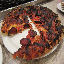

In [38]:
test_image

In [39]:
## Convert image to array
test_image = image.img_to_array(test_image)

## For single prediction change the dimension using axis. To remove problem of batch
test_image=test_image.reshape(1,64,64,3)

result = classifier.predict(test_image)

In [40]:
## Class label of dog and cat

if result == 0:
    prediction = 'Burnt Pizza'
else:
    prediction = 'Good Pizza'
    

In [41]:
prediction

'Good Pizza'

# Saving the Model

In [ ]:
#serialize model to json
model_json = classifier.to_json()
with open("Binary.json","w") as json_file:
    json_file.write(model_json)
#serialize weights to HDFS
classifier.save_weights("Binary.h5")
print("Save model to disk")